<a name="paragraph1"></a> 
# 1. Предобработка данных 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
# загружаем датафрейм
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# знакомимся с датафреймом
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# проверяем, корректны ли типы данных, нет ли пропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
# удостоверяемся в отсутствии пропущенных значений
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# проверяем строки датафрейма на полные дубликаты
df.duplicated().sum()

0

In [7]:
# проверяем на сдубликаты столбцы, где наименьшая вероятность
# получить одинаковые значения
df[['Avg_additional_charges_total', 'Avg_class_frequency_total',
    'Avg_class_frequency_current_month']].duplicated().sum()

0

In [8]:
# приводим название столбцов к нижнему регистру
df.set_axis(df.columns.str.lower(), axis='columns', inplace=True)

**Предобработка данных завершена. Пропущенных значений и дубликатов не выявлено. Все данные имеют корректный тип.**

<a name="paragraph2"></a> 
# 2. Исследовательский анализ данных 

In [9]:
# посмотрим на основные статистические показатели 
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По гендеру пользователи распределены примерно поровну. Большинство (84.5%) ходят в фитнес-центр в своем районе. 30% пришли в фитнес-центр по промокоду от друга. 41% посещают групповые занятия. Средний возраст посетителя - 29 лет. 26.5% посетителей ушли в текущем месяце.

In [10]:
# посмотрим на средние значения признаков для тех, кто ушёл 
# в отток и тех, кто остался
df.groupby('churn')[df.columns.values].mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
churn,,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0


На данном этапе стоит заметить, что среди тех, кто ушел в отток, небольшой процент тех людей, которые пришли от партнеров и от друзей. Также среди ушедших в отток, немного тех, кто посещал групповые занятия.

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


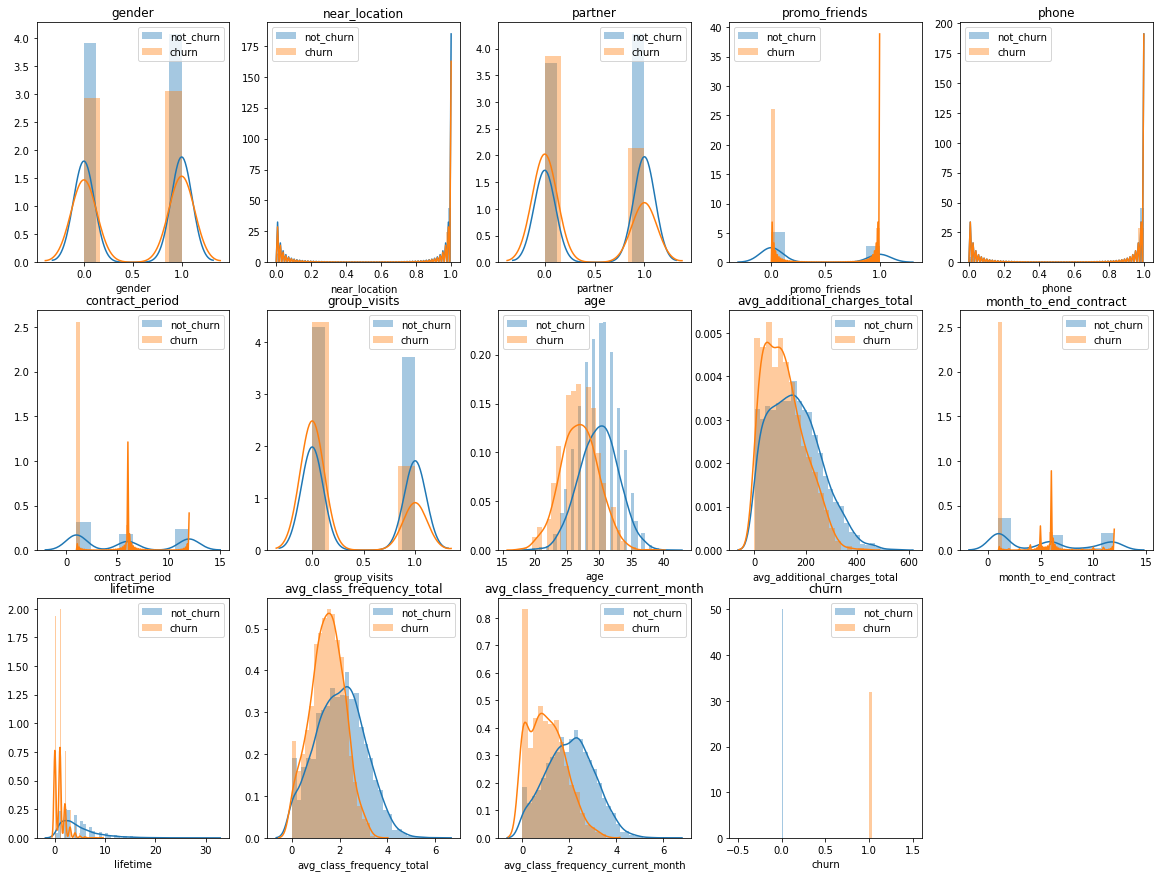

In [11]:
# построим график распределения признаков для тех, кто ушел в отток и для тех,
# кто остался
plt.subplots(figsize = (20, 15))
num_cols = 5
num_rows = 3
for i, col in enumerate(df.columns.values):
    sns.distplot(df.query('churn == 0')[col], label = 'not_churn',
                 ax=plt.subplot(num_rows, num_cols, i + 1))
    sns.distplot(df.query('churn == 1')[col], label = 'churn')
    plt.title(col)
    plt.legend()

Графики распределения демонстрируют, что среди пользователей, ушедших в отток, большинство уходят в первые месяцы пользования. Также распределение возраста для тех, кто ушёл, левее, чем для тех, кто остался, что говорит о том, что более молодые люди уходят чаще. 

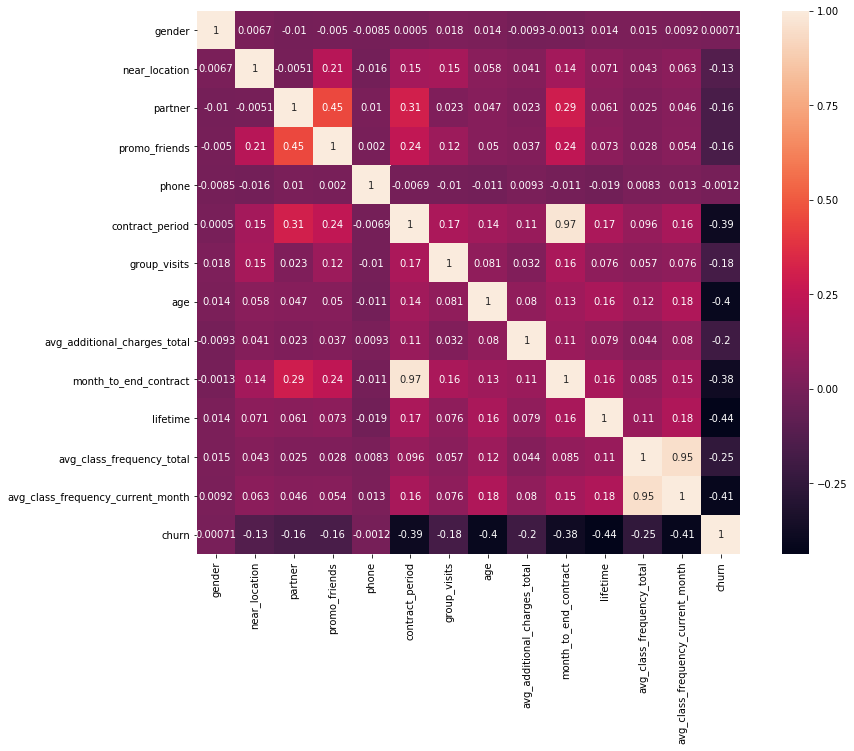

In [12]:
# построим матрицу корреляций
corr_m = df.corr()

plt.figure(figsize = (15, 10))
sns.heatmap(corr_m, square = True, annot = True)

Значение коэффициента корреляции по целевой переменной нигде не превышает 0.5 по модулю. На её основании нельзя сделать уверенных выводов. Тем не менее, матрица корреляций позволяет увидеть сильно сколерированные между собой признаки: длительность текущего абонемента сильно коррелирует со сроком до окончания текущего абонемента, а средняя частота посещений в месяц коррелирует с общей средней частотой посещений. Выявление мультиколлинеарности поможет при построении модели. Удалим по одному из сильно коррелирующих столбцов.

In [13]:
df.drop(['month_to_end_contract', 'avg_class_frequency_total'],
             axis=1, inplace=True)

**Исследовательский анализ данных проведен. На данном этапе были продемонстрированы основные статистические показатели для всех переменных, были построены графики распределения всех переменных, была построена матрица корреляций. Было выявлено, что большинство людей уходят в отток в первые месяцы пользования, в отток уходят более молодые люди, а также среди ушедших в отток немного людей, пришедших в фитнес-центр от партнеров и друзей.**

<a name="paragraph3"></a>
# 3. Построение модели оттока клиентов

In [14]:
# разделим данные на признаки (X) и целевую переменную (y)
X, y = df.drop('churn', axis = 1), df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_st = scaler.transform(X_train) 
X_test_st = scaler.transform(X_test) 

print('Mean for standartized train', np.mean(X_train_st[:,0]))
print('Std for standartized train', np.std(X_train_st[:,0]))
print('Mean for standartized test', np.mean(X_test_st[:,0]))
print('Std for standartized test', np.std(X_test_st[:,0]))

Mean for standartized train 9.658940314238862e-17
Std for standartized train 0.9999999999999998
Mean for standartized test 0.027503094272168318
Std for standartized test 0.9992088841371862


Обучим модель логистической регрессией

In [15]:
# задаем алгоритм на модели
model = LogisticRegression(random_state=0)

# обучаем модель
model.fit(X_train, y_train)

# сделаем прогнозы
predictions = model.predict(X_test)

# выведем метрики accuracy, precision и recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.79


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Обучим модель случайным лесом

In [16]:
# разделим данные на признаки (X) и целевую переменную (y)
X, y = df.drop('churn', axis = 1), df['churn']

# задаем алгоритм на модели
model = RandomForestClassifier(random_state=0) ### нужен random_state

# обучаем модель
model.fit(X_train, y_train)

# сделаем прогнозы
predictions = model.predict(X_test)

# выведем метрики accuracy, precision и recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.89
Precision: 0.80
Recall: 0.74


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Доля правильных ответов и полноты у модели логистической регрессии выше, в то время как метрика точности выше у модели случайного леса. Модель логистической регрессии показала себя лучше.

**Модели оттока клиентов построены. Лучше показала себя модель логистической регрессии.**

<a name="paragraph4"></a> 
# 4. Кластеризация клиентов

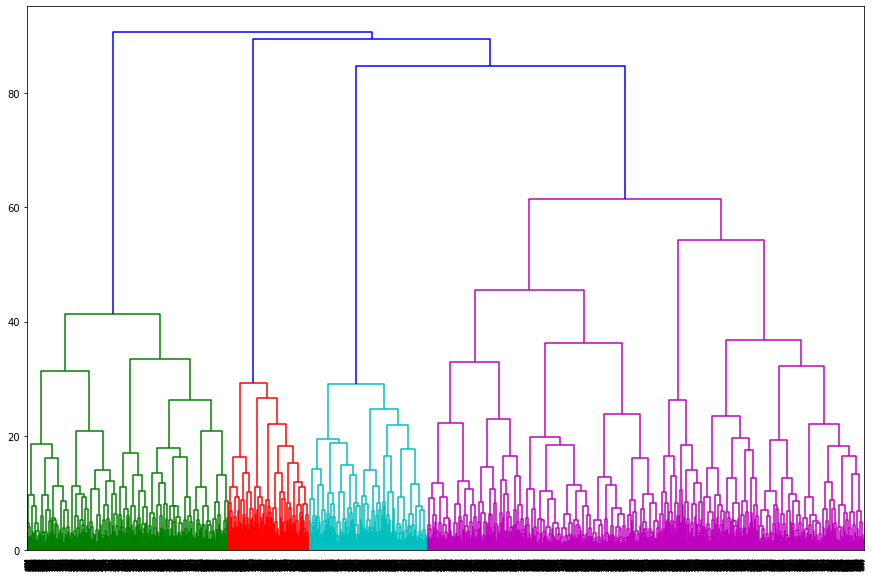

In [17]:
# стандартизируем данные
scaler = StandardScaler()
x_sc = scaler.fit_transform(df.drop(columns = ['churn']))

# строим матрицу расстояний
linked = linkage(x_sc, method = 'ward')

# рисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании полученного графика можно выделить 4 кластера.

In [18]:
# задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state = 0) ### нужен random_state

# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(x_sc) 

In [19]:
# добавляем столбец с типом кластера
df['cluster'] = labels

# смотрим на средние значения признаков и целевой переменной
# по кластерам
df.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


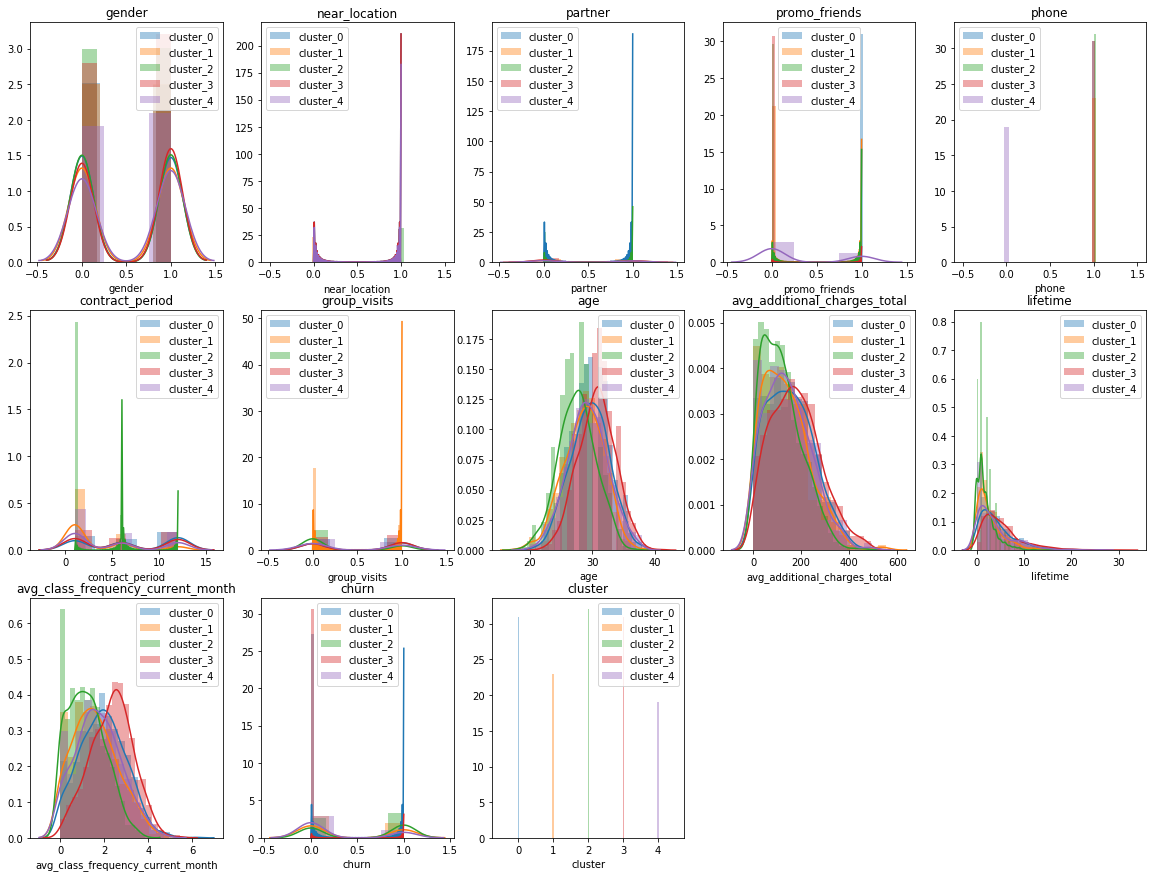

In [20]:
plt.subplots(figsize=(20, 15))
num_cols = 5
num_roes = 3
for i, col in enumerate(df.columns.values):
    sns.distplot(df.query('cluster == 0')[col], ax=plt.subplot(num_rows, num_cols, i + 1), label = 'cluster_0')
    sns.distplot(df.query('cluster == 1')[col], label = 'cluster_1') 
    sns.distplot(df.query('cluster == 2')[col], label = 'cluster_2')
    sns.distplot(df.query('cluster == 3')[col], label = 'cluster_3')
    sns.distplot(df.query('cluster == 4')[col], label = 'cluster_4')
    

    plt.title(col) 
    plt.legend()

**Доля оттока посетителей больше всего в кластерах №1 и 2 (40 и 56% соответственно) Распределение признаков для кластеров и средние значения по ним демонстрируют, что люди в кластерах с бОльшей долей оттока реже посещают групповые занятия. Также средний возраст людей, попавших в отток, меньше, чем тех людей, кто остался (при этом распределение возрастов - нормальное).  Также кластеры с высокой долей оттока характеризуются более низкой продолжительностью действуюшего абонемента, более коротким временем с момента первого обращения в фитнес-центр (т.е. если люди уходят, то с большей вероятностью в первые 2 месяца), более низкой средней частотой посещений в неделю и более низкой выручкой от других услуг фитнес-центра. Среди ушедших также небольшая доля (7%) тех, кто пришел по рекомендации от друзей.**

# 5. Выводы

### 1. Посетители, посещающие групповые занятия, реже попадают в отток. Компании следует активнее продвигать возможность посещать занятия в фитнесс-центре в групповом формате.

### 2. Средний возраст ушедших посетителей - 27 лет, средний возраст тех, кто не ушел, - 30 лет. Компании активнее привлекать людей в возрасте около 30 лет, т.к. вероятность, что они попадут в отток - меньше.

### 3. Доля посетителей, ушедших в отток и при этом пришедших по промокоду от друга, также невысокая. Компании следует активно привлекать новых клиентов через акцию "Приведи друга".

### 4. Большинство ушедших в отток клиентов не задерживаются в фитнес-центре надолго (более чем на 2 месяца). Возможно, компании стоит подумать о дополнительной мотивации клиентов посещать фитнес-центр не просто 1-2 месяца, но и более продолжительный срок.